## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스 고객들의 이벤트 관련 설문에 응답한 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 대한 응답을 어떻게 하는지, 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [2]:
# 데이터 분석 필수 라이브러리 4종 세트 불러오기
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')

In [3]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
transcript = pd.read_csv('data/transcript.csv', encoding='utf-8').drop('Unnamed: 0', axis=1)
profile = pd.read_csv('data/profile.csv', encoding='utf-8').drop('Unnamed: 0', axis=1)
portfolio = pd.read_csv('data/portfolio.csv', encoding='utf-8').drop('Unnamed: 0', axis=1)

In [4]:
print(transcript.shape)
transcript.head()

(306534, 4)


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [5]:
print(profile.shape)
profile.head()

(17000, 5)


,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
print(portfolio.shape)
portfolio.head()

(10, 6)


,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [7]:
# 각 데이터에 결측치가 있는지 확인합니다.
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [8]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [9]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [10]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
profile.gender.unique()

array([nan, 'F', 'M', 'O'], dtype=object)

In [11]:
profile.income.unique()

array([    nan, 112000., 100000.,  70000.,  53000.,  51000.,  57000.,
        46000.,  71000.,  52000.,  42000.,  40000.,  69000.,  88000.,
        59000.,  41000.,  96000.,  89000.,  33000.,  68000.,  63000.,
        30000.,  98000.,  37000.,  80000.,  48000.,  38000.,  56000.,
        93000.,  50000.,  35000.,  47000.,  87000.,  76000.,  64000.,
        72000., 117000.,  55000.,  77000.,  85000.,  36000.,  91000.,
       107000.,  66000.,  58000.,  74000.,  84000.,  54000.,  49000.,
        73000.,  78000.,  31000.,  60000.,  44000., 114000.,  65000.,
        79000.,  67000.,  94000., 108000.,  61000.,  43000.,  92000.,
        62000.,  83000.,  34000., 105000.,  82000., 118000., 109000.,
        99000.,  45000., 106000.,  95000., 103000., 101000., 110000.,
        86000.,  39000.,  75000.,  90000.,  81000.,  32000., 120000.,
       119000.,  97000., 104000., 113000., 115000., 111000., 102000.,
       116000.])

gender는 str타입, income은 float 타입임을 확인 가능하다.    
income의 결측치에 대하여 평균값으로 대체하여 준 후, gender의 결측치에 대하여는 제거해 준다.

In [12]:
# 결측치를 처리해줍니다. # 평균과 같은 통계량으로 채워주거나, 버립니다.
profile['income']=profile.income.fillna(profile.income.mean())
profile.dropna(axis=0, inplace=True)
profile.index=range(len(profile))
profile.head()

,gender,age,id,became_member_on,income
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.

In [13]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y-%m-%d')
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 579.2+ KB


#### 성별에 관한 분석

Text(0, 0.5, 'count')

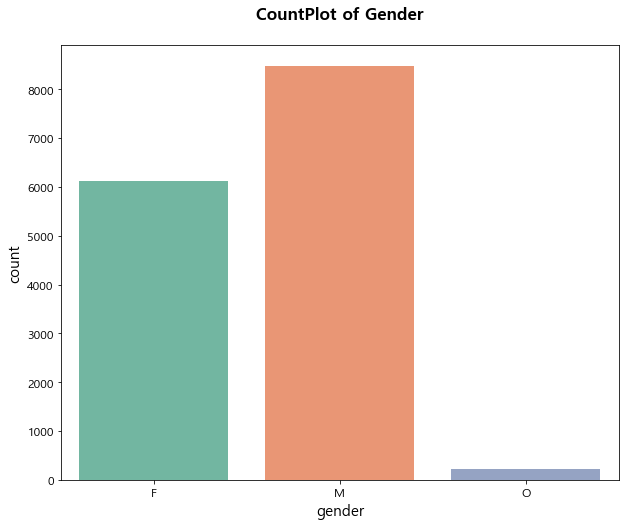

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(data=profile, x='gender', palette="Set2")
plt.title("CountPlot of Gender\n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('gender', fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

남성, 여성 순으로 설문조사에 많이 참여하였다.

#### 나이에 대한 분석

Text(0, 0.5, 'count')

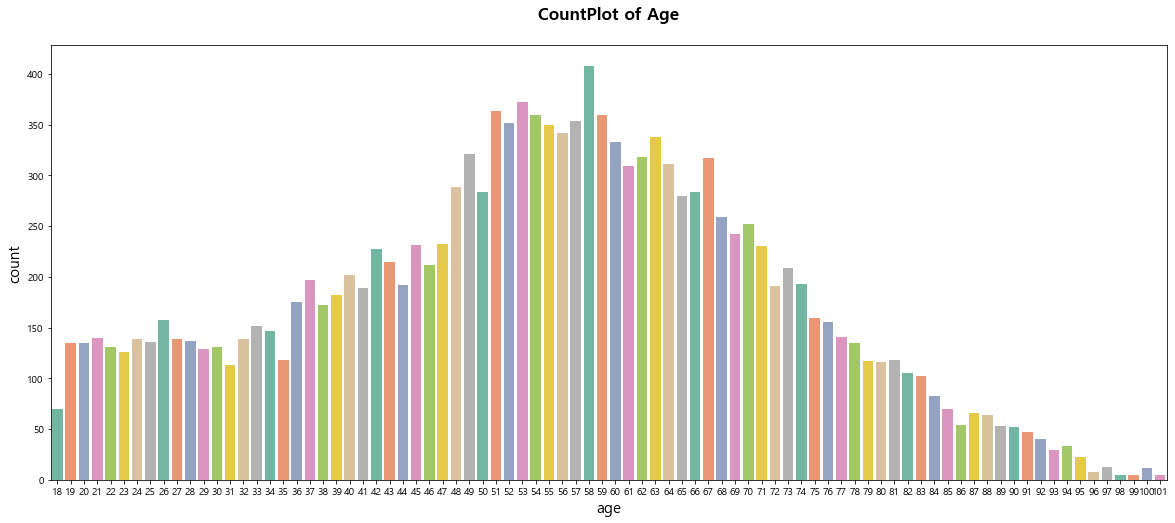

In [15]:
plt.figure(figsize=(20,8))
sns.countplot(data=profile, x='age', palette="Set2")
plt.title("CountPlot of Age\n", fontsize=17, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('age', fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

Text(0, 0.5, 'count')

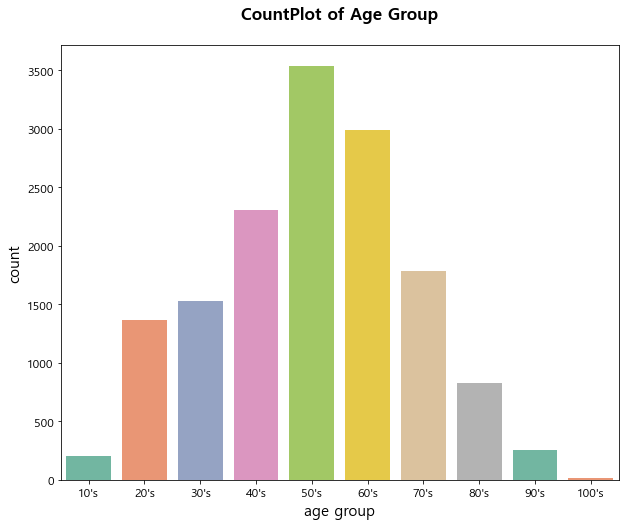

In [16]:
# 연령대별로 확인해보자
profile['age_group']=profile.age//10*10

plt.figure(figsize=(10,8))
g=sns.countplot(data=profile, x='age_group', palette="Set2")
g.set_xticklabels([str(i)+"'s" for i in range(10,101,10)])
plt.title("CountPlot of Age Group\n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('age group',fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

50대가 가장 많이 설문조사에 참여하였다

Text(0, 0.5, 'count')

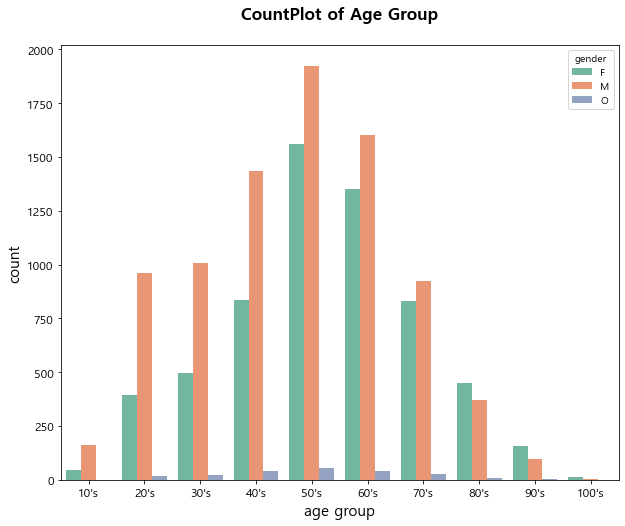

In [17]:
# 연령대/성별로 확인해보자
profile['age_group']=profile.age//10*10

plt.figure(figsize=(10,8))
g=sns.countplot(data=profile, x='age_group', hue='gender', palette="Set2")
g.set_xticklabels([str(i)+"'s" for i in range(10,101,10)])
plt.title("CountPlot of Age Group\n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('age group',fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

10대부터 70대까지는 연령대별로 남성 회원의 수가 더 많다.

#### 회원이 된 날짜에 대한 분석

Text(0, 0.5, 'count')

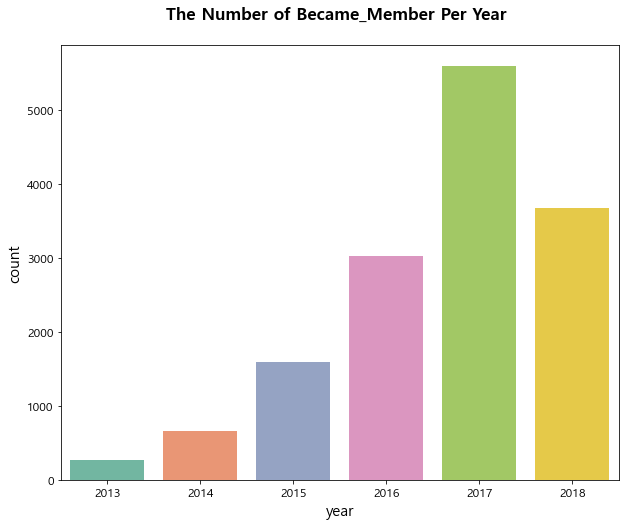

In [18]:
profile['became_member_year']=profile.became_member_on.dt.year

plt.figure(figsize=(10,8))
g=sns.countplot(data=profile, x='became_member_year', palette="Set2")
plt.title("The Number of Became_Member Per Year \n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('year',fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

2017년에 가장 많은 스타벅스 회원이 생겼다

Text(0, 0.5, 'count')

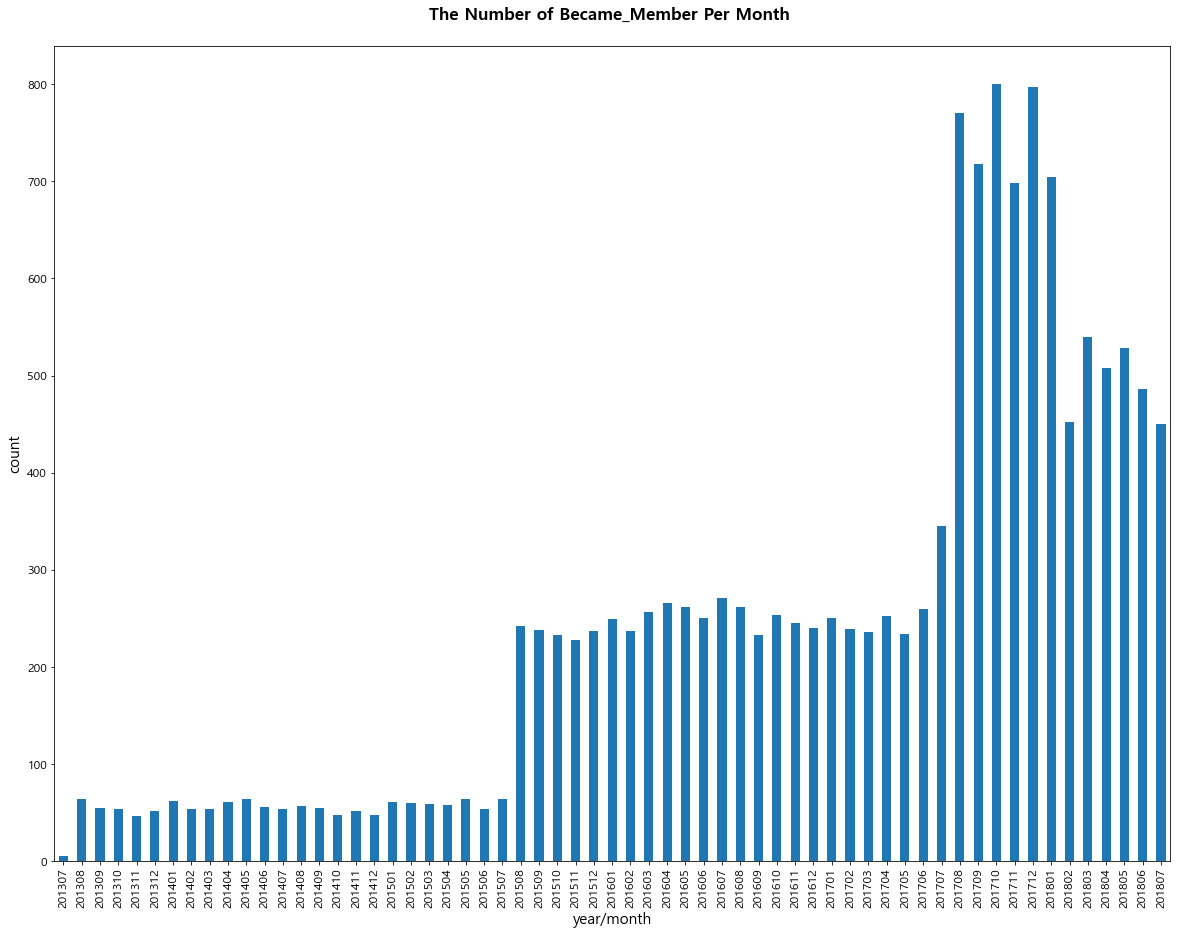

In [30]:
# 년도/월별 집중 분석
def extract_month(date):
    month=str(date.month)
    if date.month<10:
        month='0'+month
    return str(date.year)+month

profile.set_index('became_member_on').groupby(extract_month).count()['id'].plot(kind='bar', figsize=(20,15))
plt.title("The Number of Became_Member Per Month \n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('year/month',fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

2015년 8월, 2017년 9월에 스타벅스 신규회원수가 전달 대비 2배가 증가 하였다.   
또한 2018년 2월 전달 대비 하락세를 보였다.

#### 수입에 대한 분석

Text(0, 0.5, 'count')

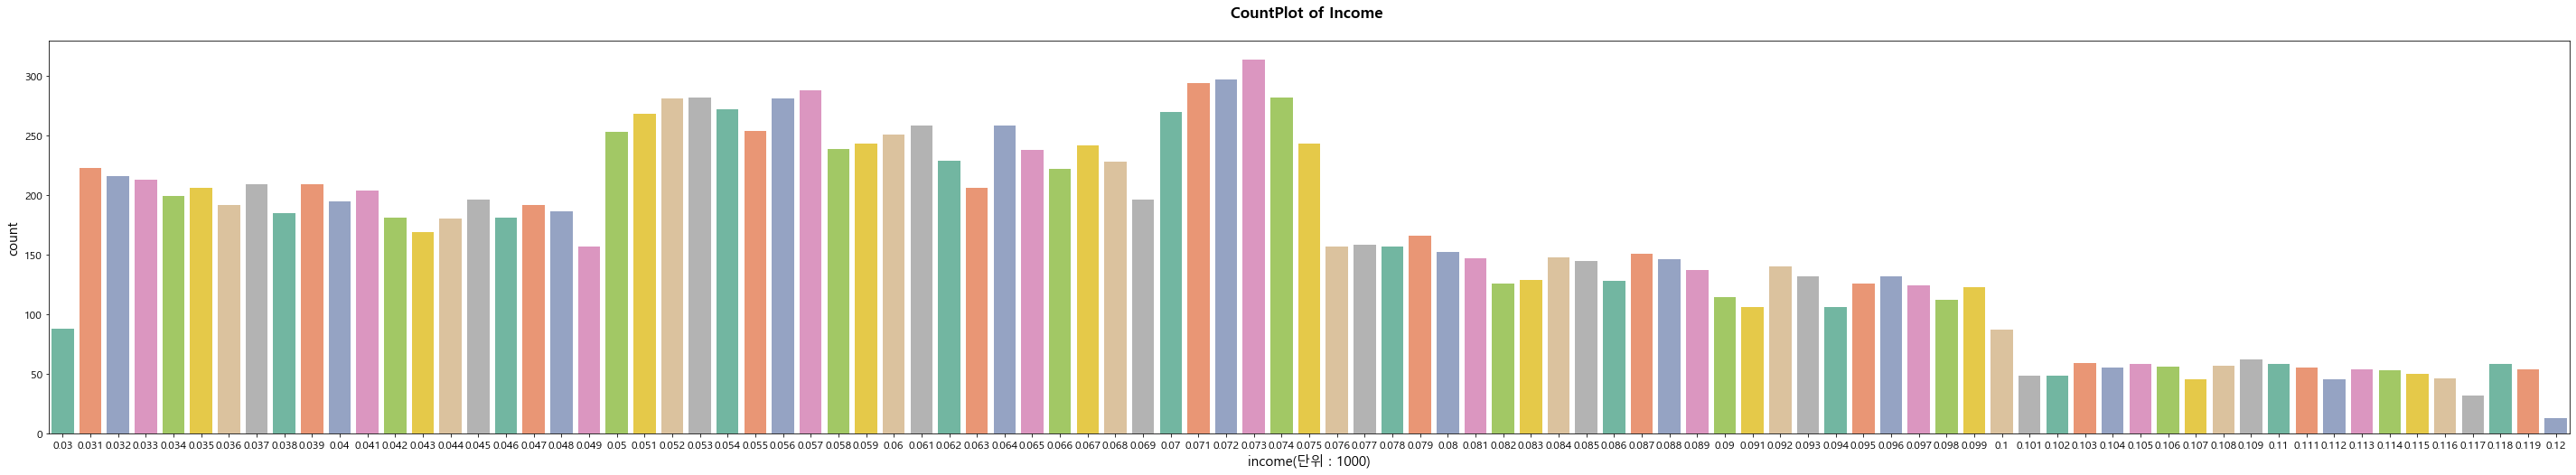

In [52]:
plt.figure(figsize=(50,8))
profile.income=profile.income/1000
g=sns.countplot(data=profile, x='income', palette="Set2")
plt.title("CountPlot of Income \n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('income(단위 : 1000)',fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

Text(0, 0.5, 'count')

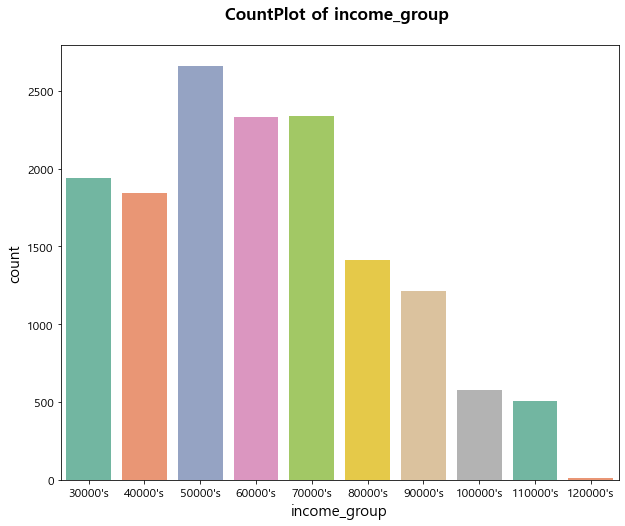

In [44]:
#수입대별로 분석
profile['income_group']=profile.income//10

plt.figure(figsize=(10,8))
g=sns.countplot(data=profile, x='income_group', palette="Set2")
g.set_xticklabels([str(i)+"0000's" for i in range(3,13)])
plt.title("CountPlot of income_group \n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('income_group',fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

#### profile 데이터에 대한 상관관계 분석

In [35]:
profile_dum=pd.get_dummies(profile.drop(['id','age_group','became_member_year','became_member_month','income_group'],axis=1))
profile_dum

,age,became_member_on,income,gender_F,gender_M,gender_O
0,55,2017-07-15,112.0,1,0,0
1,75,2017-05-09,100.0,1,0,0
2,68,2018-04-26,70.0,0,1,0
3,65,2018-02-09,53.0,0,1,0
4,58,2017-11-11,51.0,0,1,0
...,...,...,...,...,...,...
14820,45,2018-06-04,54.0,1,0,0
14821,61,2018-07-13,72.0,0,1,0
14822,49,2017-01-26,73.0,0,1,0
14823,83,2016-03-07,50.0,1,0,0


In [36]:
profile_dum.corr()

,age,income,gender_F,gender_M,gender_O
age,1.000000,0.306703,0.152200,-0.151504,0.000051
income,0.306703,1.000000,0.229396,-0.225496,-0.011808
gender_F,0.152200,0.229396,1.000000,-0.971083,-0.101119
gender_M,-0.151504,-0.225496,-0.971083,1.000000,-0.139322
gender_O,0.000051,-0.011808,-0.101119,-0.139322,1.000000


### 4. transcript에 대한 분석

- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 멋지게 시각화해 줄 plot을 seaborn에서 가져와 구현합니다.


- `person`과 `values` column은 분석 대상에서 제외합니다.


> values에 대한 패턴이 궁금하다면, 아래 코드를 참고해보세요 ! (배우지 않은 내용이 있어, 어려울 수 있습니다)

#### event에 대한 분석

In [39]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

Text(0, 0.5, 'count')

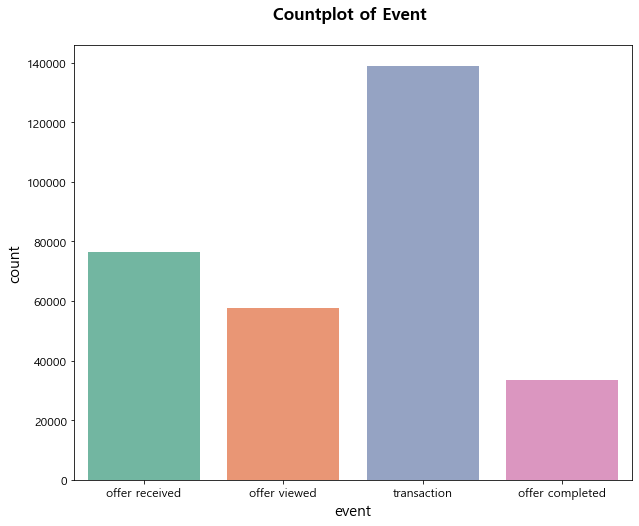

In [43]:
plt.figure(figsize=(10,8))
g=sns.countplot(data=transcript, x='event', palette="Set2")
plt.title("Countplot of Event \n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('event',fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

#### time에 대한 분석

In [58]:
transcript.groupby(['time']).count()

,person,event,value,value_key,value_value
time,,,,,
0,15561,15561,15561,15561,15561
6,2506,2506,2506,2506,2506
12,2215,2215,2215,2215,2215
18,2015,2015,2015,2015,2015
24,1921,1921,1921,1921,1921
...,...,...,...,...,...
690,1260,1260,1260,1260,1260
696,1326,1326,1326,1326,1326
702,1115,1115,1115,1115,1115


Text(0, 0.5, 'count')

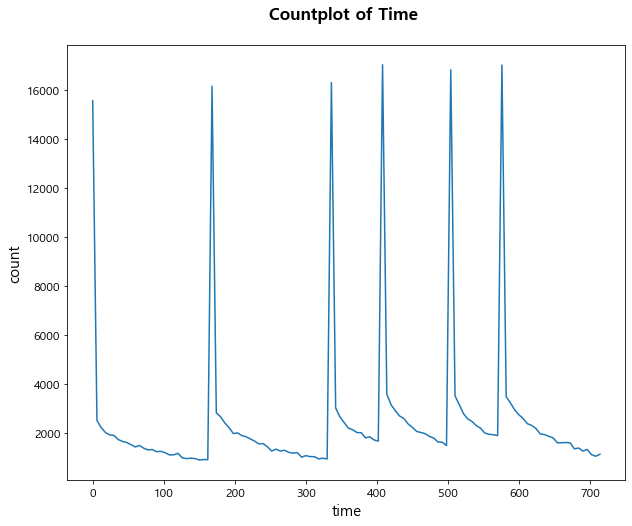

In [63]:
transcript_timegroup=transcript.groupby(['time']).count()

plt.figure(figsize=(10,8))
g=sns.lineplot(x=transcript_timegroup.index,y=transcript_timegroup.person)
plt.title("Countplot of Time \n", fontsize=17, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('time',fontdict={'size':15})
plt.ylabel('count', fontdict={'size':15})

#### (Advanced, optional) value에 대한 분석 

In [22]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [23]:
list(transcript.value[0].keys())[0]

'offer id'

In [24]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

,person,event,value,time,value_key,value_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3.53


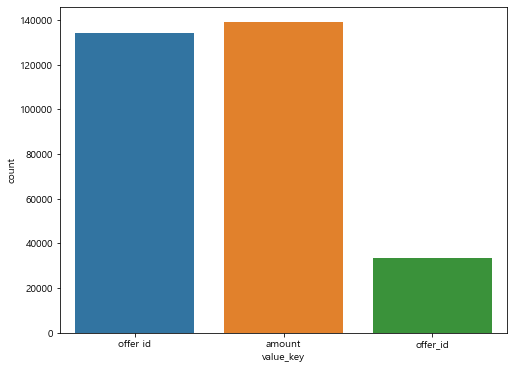

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key")
plt.show()

In [26]:
transcript.value_value.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
                                    ...  
635.06                                  1
42.51                                   1
124.03                                  1
40.49                                   1
476.33                                  1
Name: value_value, Length: 5113, dtype: int64

In [27]:
temp = transcript.loc[transcript.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

,id
0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2906b810c7d4411798c6938adc9daaa5
3,fafdcd668e3743c1bb461111dcafc2a4
4,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2
167577,fafdcd668e3743c1bb461111dcafc2a4
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7
167579,fafdcd668e3743c1bb461111dcafc2a4


In [28]:
temp.value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
9b98b8c7a33c4b65b9aebfe6a799e6d9    16202
2906b810c7d4411798c6938adc9daaa5    15767
5a8bc65990b245e5a138643cd4eb9837    14305
0b1e1539f2cc45b7b9fa7c272da2e1d7    13751
3f207df678b143eea3cee63160fa8bed    11761
Name: value_value, dtype: int64

In [29]:
temp_portfolio = pd.merge(temp_df, portfolio, how="left", on="id")
temp_portfolio

,id,reward,channels,difficulty,duration,offer_type
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"['web', 'email', 'mobile']",5,7,bogo
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount
2,2906b810c7d4411798c6938adc9daaa5,2,"['web', 'email', 'mobile']",10,7,discount
3,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"['web', 'email', 'mobile', 'social']",7,7,discount
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount


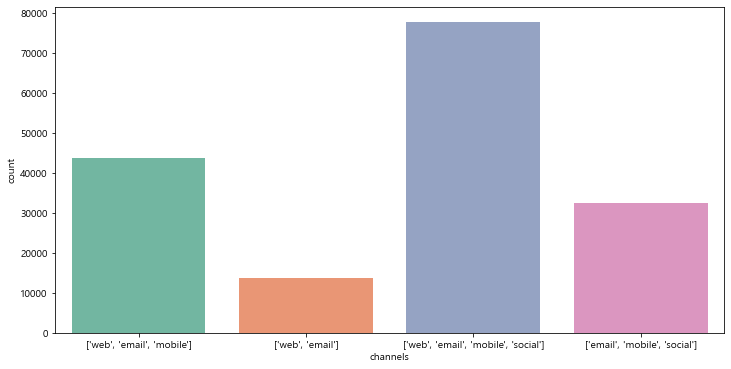

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_portfolio, x="channels", palette="Set2")
plt.show()